In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
df = pd.read_csv('data/rabobank_data.csv',sep=';')


In [9]:
df.columns

Index(['start_id', 'total', 'count', 'year_from', 'year_to', 'end_id'], dtype='object')

In [13]:
out_transfer = df.groupby('start_id')[['total','count']].sum().reset_index(names='user_id')
out_transfer.columns = ['user_id','out_total','out_count']
in_transfer = df.groupby('end_id')[['total','count']].sum().reset_index(names='user_id')
in_transfer.columns = ['user_id','in_total','in_count']


In [16]:
df_out_degree = df.groupby('start_id').size().reset_index()
df_out_degree.columns = ['user_id','out_degree']
df_in_degree = df.groupby('end_id').size().reset_index()
df_in_degree.columns = ['user_id','in_degree']

In [17]:
merged_df = pd.merge(out_transfer, in_transfer, on='user_id', how='outer')
merged_df = pd.merge(merged_df, df_out_degree, on='user_id', how='outer')
merged_df = pd.merge(merged_df, df_in_degree, on='user_id', how='outer')

In [19]:
merged_df = merged_df.fillna(0)

In [22]:
num_users_with_in_degree_gt_0 = merged_df[merged_df['in_degree'] > 0].shape[0]
num_users_with_in_degree_gt_0

690490

In [23]:
num_users_with_in_degree_gt_0 = merged_df[merged_df['out_degree'] > 0].shape[0]
num_users_with_in_degree_gt_0

1300207

In [24]:
num_users = merged_df[(merged_df['out_degree'] > 0)&(merged_df['in_degree'] > 0)].shape[0]
num_users

366667

In [29]:
total_transaction_amount = merged_df['out_total'].sum()
total_transaction_amount

291294725973.0

In [30]:
total_transaction_count = merged_df['in_count'].sum()
total_transaction_count

110609151.0

In [31]:
total_transaction_amount/total_transaction_count

2633.549967063756

In [32]:
len(merged_df)

1624030

In [33]:
merged_df['in_degree'].sum()

4127043.0

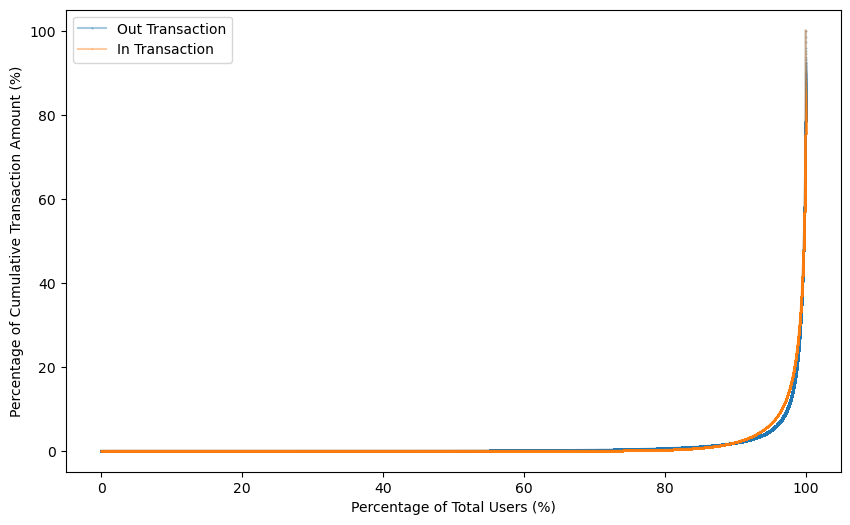

In [42]:

sorted_out_df = merged_df.sort_values(by ='out_total').reset_index(drop=True)
sorted_out_df['cumulative_out_total'] = sorted_out_df['out_total'].cumsum()
sorted_out_df['user_percentage'] = (sorted_out_df.index + 1) / len(sorted_out_df) * 100
sorted_out_df['cumulative_out_total_percentage'] = sorted_out_df['cumulative_out_total'] / sorted_out_df['out_total'].sum() * 100


sorted_in_df = merged_df.sort_values(by='in_total').reset_index(drop=True)
sorted_in_df['cumulative_in_total'] = sorted_in_df['in_total'].cumsum()
sorted_in_df['user_percentage'] = (sorted_in_df.index + 1) / len(sorted_in_df) * 100
sorted_in_df['cumulative_in_total_percentage'] = sorted_in_df['cumulative_in_total'] / sorted_in_df['in_total'].sum() * 100


plt.figure(figsize=(10, 6))
plt.plot(sorted_out_df['user_percentage'], sorted_out_df['cumulative_out_total_percentage'], marker='o', label='Out Transaction',markersize=0.5,alpha=0.4)


plt.plot(sorted_in_df['user_percentage'], sorted_in_df['cumulative_in_total_percentage'], marker='x', label='In Transaction',markersize=0.5,alpha=0.4)


plt.xlabel('Percentage of Total Users (%)')
plt.ylabel('Percentage of Cumulative Transaction Amount (%)')
plt.legend()
plt.show()

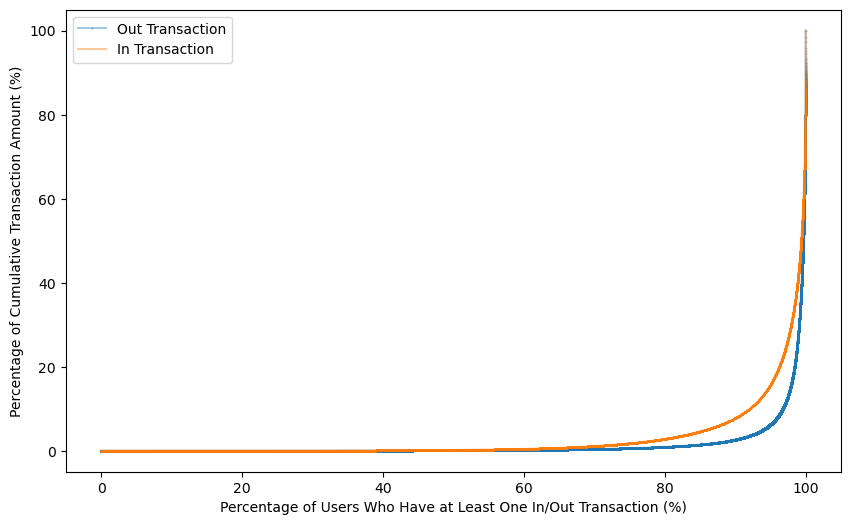

In [44]:
filter_df = merged_df[merged_df['out_degree'] > 0]
sorted_out_df = filter_df.sort_values(by ='out_total').reset_index(drop=True)
sorted_out_df['cumulative_out_total'] = sorted_out_df['out_total'].cumsum()
sorted_out_df['user_percentage'] = (sorted_out_df.index + 1) / len(sorted_out_df) * 100
sorted_out_df['cumulative_out_total_percentage'] = sorted_out_df['cumulative_out_total'] / sorted_out_df['out_total'].sum() * 100

filter_df = merged_df[merged_df['in_degree'] > 0]
sorted_in_df = filter_df.sort_values(by='in_total').reset_index(drop=True)
sorted_in_df['cumulative_in_total'] = sorted_in_df['in_total'].cumsum()
sorted_in_df['user_percentage'] = (sorted_in_df.index + 1) / len(sorted_in_df) * 100
sorted_in_df['cumulative_in_total_percentage'] = sorted_in_df['cumulative_in_total'] / sorted_in_df['in_total'].sum() * 100


plt.figure(figsize=(10, 6))
plt.plot(sorted_out_df['user_percentage'], sorted_out_df['cumulative_out_total_percentage'], marker='o', label='Out Transaction',markersize=0.5,alpha=0.4)


plt.plot(sorted_in_df['user_percentage'], sorted_in_df['cumulative_in_total_percentage'], marker='x', label='In Transaction',markersize=0.5,alpha=0.4)


plt.xlabel('Percentage of Users Who Have at Least One In/Out Transaction (%)')
plt.ylabel('Percentage of Cumulative Transaction Amount (%)')
plt.legend()
plt.show()